In [ ]:
# List of image downloading and reading
# Data augmentation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 6s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/5829610661_8439ba4a77_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2465442759_d4532a57a3.jpg'),
 PosixPath('datasets/flower_photos/dandelion/6972675188_37f1f1d6f6.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4638438929_2ec76083c8_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/15821571649_06c4b9a868_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6690926183_afedba9f15_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1793211631_68c31a74dc.jpg'),
 PosixPath('datasets/flower_photos/roses/6655078437_759fd626fd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg'),
 PosixPath('datasets/flower_photos/roses/898102603_2d5152f09a.jpg')]

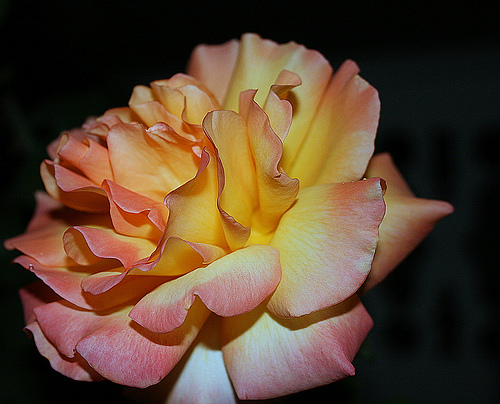

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/6690926183_afedba9f15_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1793211631_68c31a74dc.jpg'),
 PosixPath('datasets/flower_photos/roses/6655078437_759fd626fd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg'),
 PosixPath('datasets/flower_photos/roses/898102603_2d5152f09a.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/6690926183_afedba9f15_n.jpg'

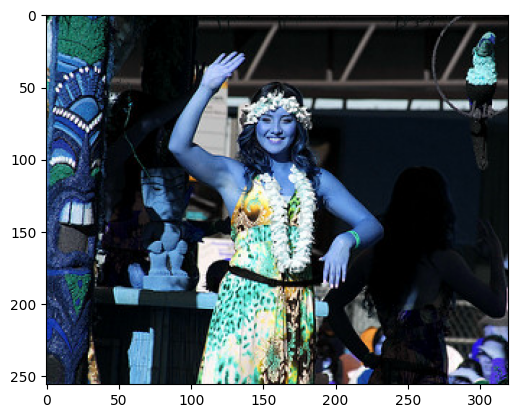

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape
plt.imshow(img)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape,y_train.shape

((2752, 180, 180, 3), (2752,))

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
    layers.Conv2D(input_shape=(180, 180, 3),filters=16,kernel_size=(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 96s 1s/step - loss: 1.6773 - accuracy: 0.1730
Epoch 2/30
86/86 [==============================] - 92s 1s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 3/30
86/86 [==============================] - 103s 1s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 4/30
86/86 [==============================] - 95s 1s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 5/30
86/86 [==============================] - 96s 1s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 6/30
86/86 [==============================] - 93s 1s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 7/30
86/86 [==============================] - 97s 1s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 8/30
86/86 [==============================] - 99s 1s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 9/30
86/86 [==============================] - 94s 1s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 10/30
86/86 [==============================] - 95s 1s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 11/30
86/86 

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 11s 365ms/step - loss: 1.6094 - accuracy: 0.1678


[1.609437346458435, 0.16775599122047424]

In [ ]:
model.save_weights('weights.h5')

In [ ]:
model_weights=model.get_weights()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,load_img,img_to_array

img_gen= ImageDataGenerator(rotation_range=40,width_shift_range=0.2, zoom_range=0.2,horizontal_flip=True,shear_range=0.3,fill_mode='nearest')

model.fit(img_gen.flow(X_train_scaled, y_train,batch_size=100), epochs=5)


Epoch 1/5
28/28 [==============================] - 134s 5s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 2/5
28/28 [==============================] - 125s 4s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 3/5
28/28 [==============================] - 122s 4s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 4/5
28/28 [==============================] - 121s 4s/step - loss: 1.6094 - accuracy: 0.1741
Epoch 5/5
28/28 [==============================] - 127s 4s/step - loss: 1.6094 - accuracy: 0.1741


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 13s 442ms/step - loss: 1.6094 - accuracy: 0.1678


[1.609437346458435, 0.16775599122047424]